In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
file_id = "1Hmm9ZR2gQE9OvDjf_DkwccLFX41twOTk"
df = pd.read_csv(f"https://drive.google.com/uc?id={file_id}")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop("customerID", axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
pd.to_numeric(df.TotalCharges, errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [5]:
df = df[df.TotalCharges != ' ']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7032, 20)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

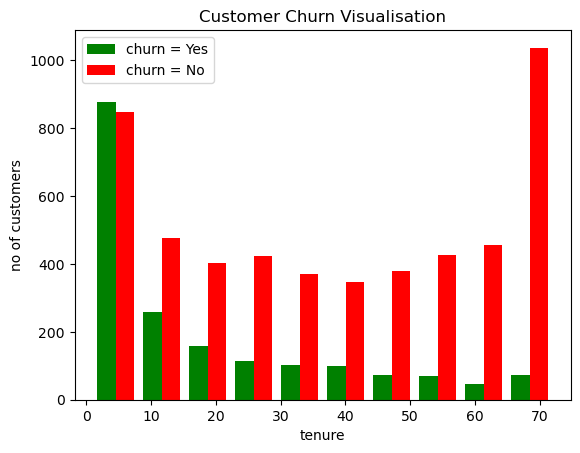

In [9]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=["churn = Yes", "churn = No"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("no of customers")
plt.title("Customer Churn Visualisation")
plt.show()

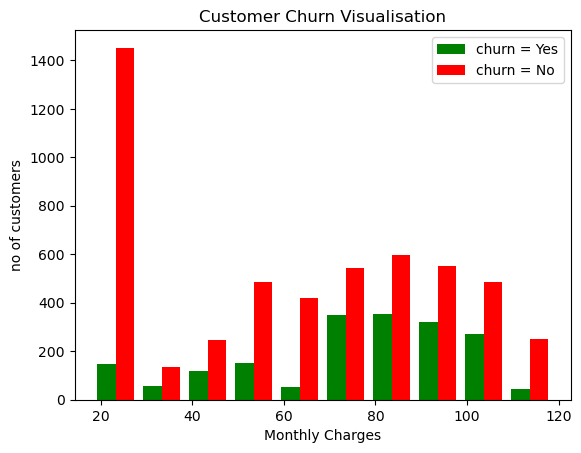

In [10]:
MonthlyCharges_yes = df[df.Churn == 'Yes'].MonthlyCharges
MonthlyCharges_no = df[df.Churn == 'No'].MonthlyCharges

plt.hist([MonthlyCharges_yes, MonthlyCharges_no], color=['green', 'red'], label=["churn = Yes", "churn = No"])
plt.legend()
plt.xlabel("Monthly Charges")
plt.ylabel("no of customers")
plt.title("Customer Churn Visualisation")
plt.show()

In [11]:
def get_unique(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")

In [12]:
get_unique(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
df.replace("No internet service", "No", inplace = True)
df.replace("No phone service", "No", inplace = True)
get_unique(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
yes_no = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no:
    df[col].replace({"Yes":1, "No":0}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11568\628422979.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({"Yes":1, "No":0}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11568\628422979.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace({"Yes":1, "No":0}

In [15]:
get_unique(df)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
df['gender'].replace({"Male":0, "Female":1}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11568\2484602807.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({"Male":0, "Female":1}, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_11568\2484602807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace(

In [17]:
get_unique(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])
get_unique(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [19]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [21]:
feature = df.drop('Churn', axis='columns')
target = df['Churn']

In [22]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.2, random_state=40)

In [23]:
len(train_x.columns)

26

In [24]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(26, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

# model = keras.Sequential()
# model.add(keras.Input(shape=(26,)))
# model.add(keras.layers.Dense(20))
# model.add(keras.layers.Dense(1))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.fit(train_x, train_y, epochs=5)

Epoch 1/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6334 - loss: 0.6145
Epoch 2/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7876 - loss: 0.4386
Epoch 3/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8006 - loss: 0.4253
Epoch 4/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8066 - loss: 0.4200
Epoch 5/5
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4246


In [26]:
model.evaluate(test_x, test_y)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8020 - loss: 0.3984


[0.41817840933799744, 0.7953091859817505]

In [27]:
predict_y = model.predict(test_x)
predict_y[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.20975333],
       [0.55042595],
       [0.6532838 ],
       [0.29551536],
       [0.01248217]], dtype=float32)

In [28]:
pred_y = []

for ele in predict_y:
    if ele > 0.5:
        pred_y.append(1)
    else:
        pred_y.append(0)

In [29]:
pred_y[:10]

[0, 1, 1, 0, 0, 0, 1, 0, 0, 0]

In [30]:
test_y[:10]

5414    1
1251    1
5423    1
6676    0
4080    0
5775    0
2008    1
5673    0
1150    0
5000    0
Name: Churn, dtype: int64

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1050
           1       0.60      0.57      0.59       357

    accuracy                           0.80      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



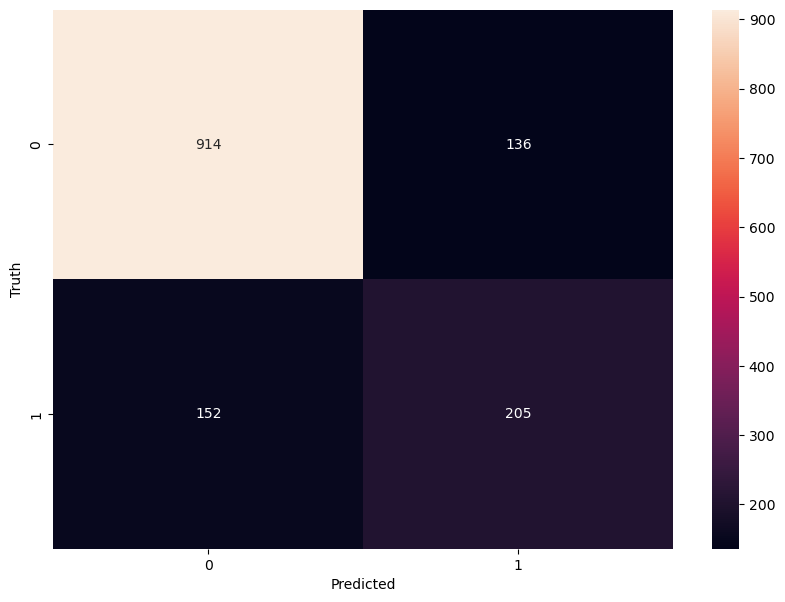

In [80]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=test_y, predictions=pred_y)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#### Accuracy

In [97]:
accuracy_ = round((914 + 205) / (914 + 205 + 152 + 136), 2)
accuracy_

0.8

#### Precision for class 0

In [100]:
precision_for_zero = 914 / (914 + 152)
precision_for_zero

0.8574108818011257

#### Precision for class 1

In [103]:
precision_for_one = 205 / (205 + 136)
precision_for_one

0.6011730205278593

#### Recall for class 0

In [107]:
recall_zero = 914 / (914 + 136)
recall_zero

0.8704761904761905

#### Recall for class 1

In [110]:
recall_one = 205 / (205 + 152)
recall_one

0.5742296918767507

##### End